In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings ('ignore')


In [2]:
data= pd.read_csv('F:\IT Learning\My Projects\Data Science And ML Projects\Human Activity Recognition with Smartphones\Human Activity Reco. with smartphone data.csv')

In [3]:
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [4]:
data.shape

(7352, 563)

In [5]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [7]:
list(data.columns)

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [8]:
data.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

<AxesSubplot: >

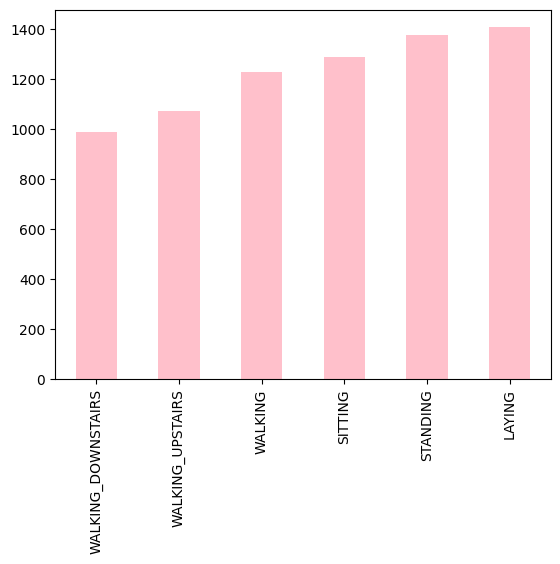

In [9]:
data['Activity'].value_counts().sort_values().plot(kind = 'bar', color = 'pink')

In [10]:
data.drop('subject', axis=1,inplace=True)

In [11]:
encoder= LabelEncoder()
data['Activity']=encoder.fit_transform(data['Activity'])

In [12]:
duplicate_columns = data.columns[data.T.duplicated()].tolist() 

In [13]:
data=data.drop(columns= duplicate_columns)

In [14]:
data.shape

(7352, 541)

In [15]:
X= data.drop('Activity', axis=1)
y= data['Activity']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
model= MLPClassifier()
model.fit(X_train,y_train)

MLPClassifier()

In [18]:
Model_Score_Raw_data=model.score(X_test,y_test)
Model_Score_Raw_data

0.9814143245693563

In [19]:
model.score(X_train,y_train)

0.9978624174115818

In [20]:
selector= VarianceThreshold(threshold=0.05)
selected_features= selector.fit(X_train)
X_train_high_variance= selector.transform(X_train)
X_test_high_variance= selector.transform(X_test)



In [21]:
# Total High Variance Features Only, Less than threshold features are already removed
sum(selected_features.get_support())

347

In [22]:
selected_indices=selected_features.get_support()
selected_feature_names= X_train.columns[selected_indices]

In [23]:
X_train_high_variance= pd.DataFrame(X_train_high_variance,columns= selected_feature_names)
X_test_high_variance= pd.DataFrame(X_test_high_variance,columns= selected_feature_names)

In [24]:
X_train_high_variance.shape, X_test_high_variance.shape

((5146, 347), (2206, 347))

In [25]:
model= MLPClassifier()
model.fit(X_train_high_variance,y_train)

MLPClassifier()

In [26]:
Model_Score_After_vt=model.score(X_test_high_variance,y_test)
Model_Score_After_vt

0.986400725294651

In [27]:
X_train_high_variance.shape

(5146, 347)

In [28]:
X_train_high_variance['Activity']= data['Activity']
X_train_high_variance.shape

(5146, 348)

**Correlation Matrix Method:**

In [29]:
threshold= 0.00001
correlation_matrix= X_train_high_variance.corr()
activity_corr= correlation_matrix['Activity']


In [30]:
#Method-1 (Find Features, those are highly correlated to target feature and then train and test then predict model score)

selected_features = correlation_matrix[
    (correlation_matrix['Activity'] > threshold) &
    (correlation_matrix.index != 'Activity')
]

print("Selected features:")
print(selected_features)

Selected features:
                                      tBodyAcc-std()-X  tBodyAcc-std()-Y  \
tBodyAcc-min()-X                             -0.967079         -0.937384   
tBodyAcc-min()-Y                             -0.903597         -0.955939   
tBodyAcc-min()-Z                             -0.826657         -0.837536   
tBodyAcc-energy()-X                           0.949367          0.805397   
tBodyAcc-arCoeff()-X,1                       -0.696417         -0.730736   
...                                                ...               ...   
angle(tBodyAccMean,gravity)                  -0.052114         -0.032088   
angle(tBodyAccJerkMean),gravityMean)         -0.038631         -0.021792   
angle(tBodyGyroMean,gravityMean)              0.037982          0.009565   
angle(Y,gravityMean)                          0.473625          0.524676   
angle(Z,gravityMean)                          0.397708          0.434379   

                                      tBodyAcc-std()-Z  tBodyAcc-mad

In [31]:
selected_feature_names= selected_features.index.to_list()

In [32]:
X_train_vt_ac= pd.DataFrame(X_train_high_variance, columns=selected_feature_names)
X_test_vt_ac= pd.DataFrame(X_test_high_variance, columns=selected_feature_names)

In [33]:
X_train_vt_ac.shape

(5146, 101)

In [34]:
model= MLPClassifier()
model.fit(X_train_vt_ac,y_train)

MLPClassifier()

In [35]:
Model_Score_After_one_to_many_corr=model.score(X_test_vt_ac,y_test)
Model_Score_After_one_to_many_corr

0.970081595648232

In [36]:
# Method-2 (Find those features, which are highly correlated to eachother)

threshold= 0.95
correlation_matrix= X_train_high_variance.corr()

highly_correlated_features= set()

for i in range (len(correlation_matrix.columns)):
    for j in range (i):
        if correlation_matrix.iloc[i,j]>threshold:
            highly_correlated_features.add(correlation_matrix.columns[i])
            highly_correlated_features.add(correlation_matrix.columns[j])




In [37]:
X_train_high_variance.drop(columns= highly_correlated_features , axis=1, inplace= True)
X_test_high_variance.drop(columns= highly_correlated_features, axis=1, inplace= True)

In [38]:
X_train_high_variance.drop('Activity', axis=1, inplace= True ) #Activity we add only just to find correlation between each and every column

In [39]:
X_train_ac2=pd.DataFrame(X_train_high_variance, columns=X_train_high_variance.columns)
X_test_ac2=pd.DataFrame(X_test_high_variance, columns=X_test_high_variance.columns)

In [40]:
X_train_ac2.shape

(5146, 114)

In [41]:
model= MLPClassifier()
model.fit(X_train_ac2,y_train)


MLPClassifier()

In [42]:
Model_Score_After_one_to_one_corr=model.score(X_test_ac2, y_test)
Model_Score_After_one_to_one_corr

0.9732547597461468

In [43]:
print('Model_Score_Raw_data:',Model_Score_Raw_data)
print('Model_Score_After_vt:',Model_Score_After_vt)
print('Model_Score_After_one_to_many_corr:',Model_Score_After_one_to_many_corr)
print('Model_Score_After_one_to_one_corr:',Model_Score_After_one_to_one_corr)

Model_Score_Raw_data: 0.9814143245693563
Model_Score_After_vt: 0.986400725294651
Model_Score_After_one_to_many_corr: 0.970081595648232
Model_Score_After_one_to_one_corr: 0.9732547597461468


**ANOVA Feature Selection:**

In [44]:
sel= SelectKBest(f_classif, k=100).fit(X_train_ac2,y_train)

In [45]:
columns=X_train_ac2.columns[sel.get_support()]

In [46]:
X_train_anova= sel.transform(X_train_ac2)
X_test_anova= sel.transform(X_test_ac2)

In [47]:
X_train_anova= pd.DataFrame(X_train_ac2, columns=columns)
X_test_anova= pd.DataFrame(X_test_ac2, columns=columns)

In [48]:
model= MLPClassifier()

In [49]:
model.fit(X_train_anova,y_train)

MLPClassifier()

In [50]:
Model_Score_after_ANOVA_feature_selection=model.score(X_test_anova,y_test)

In [51]:
print('Model_Score_Raw_data:',Model_Score_Raw_data)
print('Model_Score_After_vt:',Model_Score_After_vt)
print('Model_Score_After_one_to_many_corr:',Model_Score_After_one_to_many_corr)
print('Model_Score_After_one_to_one_corr:',Model_Score_After_one_to_one_corr)
print('Model_Score_After_AVONA_Feature_selection:',Model_Score_after_ANOVA_feature_selection)

Model_Score_Raw_data: 0.9814143245693563
Model_Score_After_vt: 0.986400725294651
Model_Score_After_one_to_many_corr: 0.970081595648232
Model_Score_After_one_to_one_corr: 0.9732547597461468
Model_Score_After_AVONA_Feature_selection: 0.970081595648232


**Chi Square Feature Selection Method:**

In [52]:
# Load the Titanic dataset

titanic_data = pd.read_csv(r"F:\IT Learning\My Projects\Python Projects\Data Cleaning Datasets\titanic_data.csv")

In [53]:
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,classe,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
885,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
886,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
887,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [54]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            176
sibsp            0
parch            0
fare             0
embarked         2
classe           0
who              0
adult_male       0
deck           686
embark_town      2
alive            0
alone            0
dtype: int64

In [55]:
titanic_data['age'].fillna(titanic_data['age'].mean(),inplace= True)
titanic_data['embarked'].fillna(titanic_data['embarked'].mode(),inplace= True)


In [56]:
titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)

In [57]:
titanic_data.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
classe           0
who              0
adult_male       0
deck           686
embark_town      2
alive            0
alone            0
dtype: int64

In [58]:
titanic_data.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
classe           0
who              0
adult_male       0
deck           686
embark_town      2
alive            0
alone            0
dtype: int64

In [59]:
titanic_data.drop(columns= 'deck',inplace= True)

In [60]:
titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0], inplace=True)

In [61]:
titanic_data.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
classe         0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [62]:
categorical_columns= ['sex','sibsp','parch','embarked','classe','who','embark_town','alive','survived']

In [63]:
data= pd.DataFrame(titanic_data, columns= categorical_columns)

In [64]:
data

,sex,sibsp,parch,embarked,classe,who,embark_town,alive,survived
0,male,1,0,S,Third,man,Southampton,no,0
1,female,1,0,C,First,woman,Cherbourg,yes,1
2,female,0,0,S,Third,woman,Southampton,yes,1
3,female,1,0,S,First,woman,Southampton,yes,1
4,male,0,0,S,Third,man,Southampton,no,0
...,...,...,...,...,...,...,...,...,...
884,male,0,0,S,Second,man,Southampton,no,0
885,female,0,0,S,First,woman,Southampton,yes,1
886,female,1,2,S,Third,woman,Southampton,no,0
887,male,0,0,C,First,man,Cherbourg,yes,1


In [65]:
# Label encode categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column]= label_encoder.fit_transform(data[column])


In [66]:
data

,sex,sibsp,parch,embarked,classe,who,embark_town,alive,survived
0,1,1,0,2,2,1,2,0,0
1,0,1,0,0,0,2,0,1,1
2,0,0,0,2,2,2,2,1,1
3,0,1,0,2,0,2,2,1,1
4,1,0,0,2,2,1,2,0,0
...,...,...,...,...,...,...,...,...,...
884,1,0,0,2,1,1,2,0,0
885,0,0,0,2,0,2,2,1,1
886,0,1,2,2,2,2,2,0,0
887,1,0,0,0,0,1,0,1,1


In [67]:
# Separate features (X) and target (y)
X= data.drop('survived',axis= 1)
y= data['survived']

In [68]:
# Perform feature selection using Chi-Square test
selector= SelectKBest(chi2, k=5)
X_new= selector.fit_transform(X,y)

In [69]:
X_new

array([[1, 2, 1, 2, 0],
       [0, 0, 2, 0, 1],
       [0, 2, 2, 2, 1],
       ...,
       [0, 2, 2, 2, 0],
       [1, 0, 1, 0, 1],
       [1, 2, 1, 1, 0]], dtype=int64)

In [70]:
# Get the selected features 
selected_features=X.columns[selector.get_support()] 

In [71]:
selected_features


Index(['sex', 'classe', 'who', 'embark_town', 'alive'], dtype='object')

In [72]:
p_values = selector.pvalues_

In [73]:
# Print the selected features and their p-values
for feature, p_value in zip(selected_features, p_values):
    print(f"Feature: {feature}, p-value: {p_value}")

Feature: sex, p-value: 6.7367605109736825e-22
Feature: classe, p-value: 0.26567465104725535
Feature: who, p-value: 0.0016689080576356504
Feature: embark_town, p-value: 0.0013845383784896526
Feature: alive, p-value: 1.8725279618960658e-13


# Wrapper Method:


**Forward Selection Method:**

In [74]:
# Load Dataset
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

In [75]:
# Before Feature Seletion Columns
raw_data_columns= X.shape[1]
raw_data_columns

30

In [76]:
# Train Test Split Data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [77]:
# Initail Base Model For initialization
base_model= LogisticRegression()

In [78]:
base_model.fit(X_train,y_train)

LogisticRegression()

In [79]:
# Base Model Score
base_model_score= base_model.score(X_test,y_test)
base_model_score

0.956140350877193

In [80]:
# Initialize the SequentialFeatureSelector
selector= SequentialFeatureSelector(model,n_features_to_select=5,direction= 'forward',scoring= 'accuracy',n_jobs=-1)

In [81]:
# Fit the SequentialFeatureSelector on the training data
selector= selector.fit(X_train,y_train)

In [82]:
# Selected features indices
selected_features= selector.get_support(indices= True)

In [83]:
selected_features

array([ 6,  9, 17, 20, 25], dtype=int64)

In [84]:
# Transform the training and testing data to include selected features only
X_train_selected= selector.transform(X_train)
X_test_selected= selector.transform(X_test)

In [85]:
# Train a final model using the selected features
final_model= LogisticRegression()

In [86]:
final_model.fit(X_train_selected,y_train)

LogisticRegression()

In [87]:
# Final Model Score After Feature Selection 
final_model_score=final_model.score(X_test_selected,y_test)
final_model_score

0.9649122807017544

In [88]:
# No. Of features After Forward Selection Method
forward_selection_columns= X_train_selected.shape[1]
forward_selection_columns

5

In [89]:
# Final Results
print ('raw_data_columns:', raw_data_columns,'&', 'base_model_score:', base_model_score)
print ('forward_selection_columns:', forward_selection_columns,'&', 'final_model_score:', final_model_score)

raw_data_columns: 30 & base_model_score: 0.956140350877193
forward_selection_columns: 5 & final_model_score: 0.9649122807017544


**Backward Elimination Feature Seletion:**

In [90]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [91]:
# Train Test Split Data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
# Base Model Score
base_model= LogisticRegression()

In [93]:
base_model.fit(X_train,y_train)

LogisticRegression()

In [94]:
base_model_score= base_model.score(X_test,y_test)
base_model_score

0.956140350877193

In [95]:
# Initialize the SequentialFeatureSelector
selector= SequentialFeatureSelector(base_model,n_features_to_select=5,direction= 'backward',scoring= 'accuracy',n_jobs=-1)

In [96]:
# Fit the SequentialFeatureSelector on the training data
selector=selector.fit(X_train,y_train)

In [97]:
# Selected features indices
selected_features= selector.get_support(indices=True)

In [98]:
# Transform the training and testing data to include selected features only
X_train_selected= selector.transform(X_train)
X_test_selected= selector.transform(X_test)

In [99]:
# Train a final model using the selected features
final_model= LogisticRegression()

In [100]:
final_model.fit(X_train_selected,y_train)

LogisticRegression()

In [101]:
# Final Model Score After Feature Selection
final_model_score= final_model.score(X_test_selected,y_test)
final_model_score

0.9649122807017544

**Exhaustive Selection/ Best Feature Selection:**

In [102]:
# Load the iris data
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [103]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [104]:
# Create Data as DataFrame
X= pd.DataFrame(X,columns=['sepal length', 'sepal width',
                 'petal length', 'petal width'])
y= pd.DataFrame(y)

In [105]:
#Train Test Split:
X_train,X_test,y_train,y_test,=train_test_split(X,y,test_size=0.2,random_state=42)

In [106]:
# Create and train base model
base_model= LogisticRegression()
base_model.fit(X_train,y_train)
base_model.score(X_test,y_test)

1.0

In [107]:
# Apply EFS method:
sel=EFS(model,max_features=4,scoring= 'accuracy',cv=5,n_jobs=-1)

In [108]:
# Fit the EFS on the training data
sel= sel.fit(X_train,y_train)

Features: 15/15

In [109]:
# Best Feature Name
selected_features= sel.best_feature_names_
selected_features

('sepal length', 'sepal width', 'petal length', 'petal width')

In [110]:
# Get Metric Data like score, cv score, accuracy,features and all.
Metric_data=sel.get_metric_dict()

In [111]:
# Best Score of feature subset
sel.best_score_

0.975

In [112]:
# Transform X_train, x_test Data according to selected features
X_train_selected= sel.transform(X_train)
X_test_selected= sel.transform(X_test)

In [113]:
# Now Train Final Model
final_model= LogisticRegression()
final_model.fit(X_train_selected,y_train)
final_model.score(X_test_selected,y_test)

1.0

**Recursive Feature Elimination:**

In [114]:
# Url of dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [115]:
#column names 
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]

# Load the dataset from the URL into a Pandas DataFrame
data = pd.read_csv(url, header=None, names=column_names)


In [116]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [117]:
# Split Data in X and y
X= data.drop('target',axis=1)
y= data['target']

In [118]:
# Model Train and Test Process
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [119]:
# Base Model selection
base_model= LogisticRegression()

In [120]:
# Trained Data fit on model
base_model.fit(X_train,y_train)

LogisticRegression()

In [121]:
# Base Model Score
base_model.score(X_test,y_test)

1.0

In [122]:
# Initialize RFE 
rfe= RFE(estimator= base_model,n_features_to_select=2)

In [123]:
# Fit the RFE on the training data
rfe= rfe.fit(X_train,y_train)

In [124]:
# Best Feature Indices
selected_features_indices= rfe.get_support(indices=True)

In [125]:
selected_features_indices

array([2, 3], dtype=int64)

In [126]:
# Best Feature Name
selected_feature_names=X_train.columns[selected_features_indices]

In [127]:
selected_feature_names

Index(['petal_length', 'petal_width'], dtype='object')

In [128]:
# Transform X_train, x_test Data according to selected features
X_train_selected= rfe.transform(X_train)
X_test_selected= rfe.transform(X_test)

In [129]:
# Now Train Final Model
final_model= LogisticRegression()

In [130]:
final_model.fit(X_train_selected,y_train)

LogisticRegression()

In [131]:
final_model.score(X_test_selected,y_test)

1.0

In [132]:
# Features Ranking
features_ranking=rfe.ranking_
features_ranking


array([3, 2, 1, 1])

# Embedded Feature Selection  method:

**Regularization Method (Lasso):**

In [133]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Access the data and target attributes
X = iris.data  # Features
y = iris.target  # Target variable

In [134]:
# Create Dataframe for both X and y
X= pd.DataFrame(X, columns= iris.feature_names)
y= pd.DataFrame(y, columns= ['target'])

In [135]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [136]:
# Create a Lasso model
lasso = Lasso(alpha=0.02, random_state=42)
# 'alpha' controls the strength of the L1 regularization, higher values result in more feature sparsity

In [137]:
# Create a feature selection transformer using SelectFromModel
# This transformer will select features based on the model's coefficients
feature_selector = SelectFromModel(lasso)

In [138]:
# Fit the transformer to the training data
feature_selector.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.02, random_state=42))

In [139]:
# Get the selected features using get_support
selected_features = feature_selector.get_support(indices=True)

In [140]:
# Get Selected Features Name (if data is in dataframe)
selected_features_name= X_train.columns[selected_features]
selected_features_name


Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')

In [141]:
# Now Transform Fitted Data in X_train and X_test
X_train= feature_selector.transform(X_train)
X_test= feature_selector.transform(X_test)

In [142]:
# Create New Dataframe with new selected features
X_train_selected= pd.DataFrame(X_train, columns= selected_features)
X_test_selected= pd.DataFrame(X_test, columns= selected_features)

In [143]:
# Final Score After Feature Selection
model= LogisticRegression()
model.fit(X_train_selected,y_train)

LogisticRegression()

In [144]:
# Final Score After Feature Selection
lasso.fit(X_train_selected,y_train)
score= lasso.score(X_test_selected,y_test)
score

0.9349898290500125

**Tree Based Embedded Method:**

In [145]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Access the data and target attributes
X = iris.data  # Features
y = iris.target  # Target variable

In [146]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [147]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)


In [148]:
# Fit the model to your training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [149]:
# Create a SelectFromModel instance
sfm = SelectFromModel(clf)


In [150]:
# Selected Features Indices
selected_features= sfm.get_support(indices=True)
selected_features


array([2, 3], dtype=int64)

In [151]:
# Fit the SelectFromModel instance and transform your data
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)


In [152]:
# Train a classifier on the selected features
clf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
clf_selected.fit(X_train_selected, y_train)


RandomForestClassifier(random_state=42)

In [153]:
# Make predictions on the test set
y_pred = clf_selected.predict(X_test_selected)


In [154]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
